In [1]:
using IntervalArithmetic

In [2]:
Λ = Interval(3.5)
α = Λ/(Λ-1)

[1.39999, 1.40001]

In [3]:
K = Int64(floor(mid(Λ)))

3

In [4]:
q_K_k(k) = max(0, 0.5*((Λ-1-k)/(Λ-1)))
F(k) = x -> x + α*(k-(k^2-(k/α)*(k+1-2*x))^(0.5))

F (generic function with 1 method)

In [5]:
[q_K_k(i) for i in 1:K]

3-element Vector{Interval{Float64}}:
     [0.299999, 0.300001]
     [0.0999999, 0.100001]
 [0, 0]

In [6]:
f1=F(1)
f2=F(2)
f3=F(3)

#1 (generic function with 1 method)

In [7]:
using RigorousInvariantMeasures

In [8]:
D = PwMap([x->f3(x)-3.0;x->f2(x)-2.0; x->f1(x)-1.0], [Interval(0), Interval(0.100001), Interval(0.300001), Interval(1)])

Piecewise-defined dynamic with 3 branches

In [9]:
B = Ulam(1024)

Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 1025))

In [10]:
alpha = PwMap([x->0.897635*x], [Interval(0), Interval(1)])

Piecewise-defined dynamic with 1 branches

In [11]:
beta = PwMap([x->(x/0.897635)], [Interval(0), Interval(0.897635)])

Piecewise-defined dynamic with 1 branches

In [12]:
D1 = beta ∘ D ∘ alpha

RigorousInvariantMeasures.ComposedDynamic((RigorousInvariantMeasures.ComposedDynamic((Piecewise-defined dynamic with 1 branches, Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 1 branches), Piecewise-defined dynamic with 3 branches)

In [13]:
Q = DiscretizedOperator(B, D1)

┌ Info: Assembling operator, the Newton stopping options are 
│ 			ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/mutare/.julia/packages/RigorousInvariantMeasures/YDNtu/src/GenericAssembler.jl:102
Computing preimages... 100%|█████████████████████████████| Time: 0:00:06


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([320, 321, 322, 323, 324, 317, 318, 319, 320, 313  …  6, 6, 6, 6, 5, 6, 5, 5, 5, 5], [1, 1, 1, 1, 1, 2, 2, 2, 2, 3  …  1016, 1017, 1018, 1019, 1020, 1020, 1021, 1022, 1023, 1024], Interval{Float64}[[0.0505168, 0.0505169], [0.280394, 0.280395], [0.279956, 0.279957], [0.279518, 0.279519], [0.109613, 0.109614], [0.206702, 0.206703], [0.28171, 0.281711], [0.281271, 0.281272], [0.230315, 0.230316], [0.0754589, 0.075459]  …  [1, 1], [1, 1], [1, 1], [1, 1], [0.600372, 0.600373], [0.399627, 0.399628], [1, 1], [1, 1], [1, 1], [1, 1]], 1024, 1024))

In [14]:
Q.L

1024×1024 SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64} with 3113 stored entries:
⠀⠀⠀⢀⡞⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⣀⡤⠤⠖⠒⠒⠚⠉
⠀⠀⠀⡼⠀⠀⠀⠀⠀⠀⠀⠀⣰⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⡤⠴⠚⠉⠁⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⣸⠁⠀⠀⠀⠀⠀⠀⠀⣰⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⡴⠚⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⢠⠇⠀⠀⠀⠀⠀⠀⠀⣰⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠞⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⡞⠀⠀⠀⠀⠀⠀⠀⢰⠃⠀⠀⠀⠀⠀⠀⠀⠀⣠⠞⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⣸⠁⠀⠀⠀⠀⠀⠀⢠⠏⠀⠀⠀⠀⠀⠀⠀⢀⡼⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠃⠀⠀⠀⠀⠀⠀⠀⡞⠀⠀⠀⠀⠀⠀⠀⢀⡞⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⢸⠁⠀⠀⠀⠀⠀⠀⢀⡞⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⡏⠀⠀⠀⠀⠀⠀⠀⡼⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⢸⠁⠀⠀⠀⠀⠀⠀⢰⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⡏⠀⠀⠀⠀⠀⠀⠀⡞⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⢰⠃⠀⠀⠀⠀⠀⠀⢠⠇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⡏⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⡏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⢰⠃⠀⠀⠀⠀⠀⠀⠀⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

In [15]:
norms = powernormbounds(B, D1; Q=Q)

64-element Vector{Float64}:
 1.0000000001234355
 1.0000000002468712
 1.000000000370307
 1.0000000004937426
 1.0000000006171783
 1.000000000740614
 1.0000000008640497
 1.0000000009874854
 0.5743041334505277
 0.20724949258745684
 0.08242397921791829
 0.04066468562236893
 0.020570061354459955
 ⋮
 1.1411612835162072e-8
 1.1411612836570671e-8
 1.141161283797927e-8
 4.910510228911351e-9
 2.479872937979351e-9
 1.252368797098653e-9
 6.324628894996178e-10
 3.194021661358079e-10
 1.700992514224909e-10
 9.058722326319265e-11
 4.824268743048971e-11
 2.569188906203708e-11

In [16]:
w = invariant_vector(B, Q)

1024-element Vector{Float64}:
 -8.310805091015633e-17
 -8.310805091015633e-17
 -8.310805091015633e-17
 -8.310805091015633e-17
  0.7296605539582646
  1.2834860269481914
  1.3592417136903463
  1.4130189712109553
  1.4607634406059549
  1.4919869623608746
  1.5239645852089994
  1.5398155160166989
  1.5577886286203049
  ⋮
  0.011721739693757569
  0.010890990994425736
  0.010061028672888725
  0.009231851488915505
  0.00840345820523515
  0.007575847587125562
  0.0067490184034764995
  0.00592296942555983
  0.005097699427141195
  0.004273207183680218
  0.003449491474787358
  0.00262545944965968

In [17]:
strong_norm(B)

TotalVariation

In [18]:
aux_norm(B)

L1

In [19]:
using Plots, LaTeXStrings

In [20]:
dfly_coefficients = dfly(strong_norm(B), aux_norm(B), D1)

(-0.0016917382888244905, 306833.666486807)

In [21]:
error = distance_from_invariant(B, D1, Q, w, norms)

5958.1090482310665

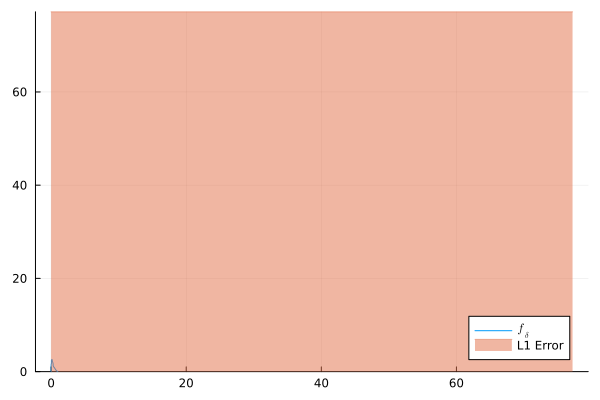

In [22]:
plot(B, w)
plot!(B, error)

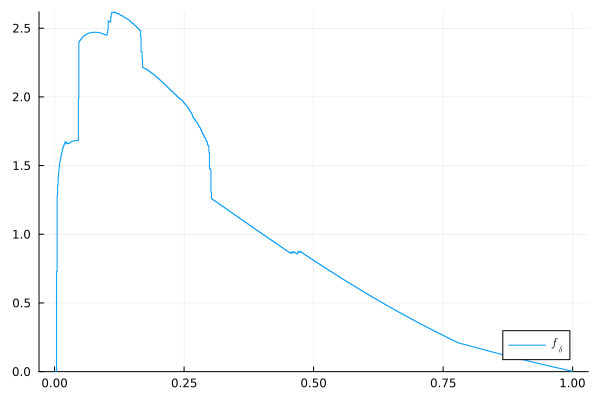

In [23]:
plot(B, w)